![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 5: Introduction to GIT & Scikit Image

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-15)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/05_Array_image_manipulation.ipynb)

**Resources:**

* [SciPy](https://scipy.org)
* [Scipy Lectures](https://scipy-lectures.org)
* [NumPy](https://numpy.org)

# SciPy ecosystem
[SciPy.org](https://scipy.org)


## Finding help within the SciPy ecosystem

### How to use a function?

In [1]:
import numpy as np
np.linspace?

### Viewing the source

In [2]:
import numpy as np
np.linspace??

### ? will work both in functions and variables

In [3]:
a = "SciPy is awesome ;)"
a?

# NumPy

In [4]:
# Within IPython notebook, add multiple print capabilities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## NumPy arrays

An array can contain:
* Values of an experiment/simulation at discrete time steps
* A signal recorded by a measurement device, e.g. sound wave
* The pixels of an image, grey-level or colour
* 3-D data measured at different X-Y-Z positions, e.g. MRI scan
* …

In [5]:
import numpy as np
a = np.array([0, 1, 2, 3])

### NumPy is memory efficient container that provides fast numerical operations

In [6]:
L = range(1000)
%timeit [i**2 for i in L]

a = np.arange(1000)
%timeit a**2

572 µs ± 40 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.31 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Reference documentation
On the web: http://docs.scipy.org/

In [7]:
# Interactive help
np.array?

In [8]:
# Looking for some stuff
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new_

In [9]:
# Looking for something when some parts of the word are known
np.con*?

### Manual creation of arrays

#### 1D

In [10]:
# Create 1D array
a = np.array([0, 1, 2, 3])
print("Array ", a)

# Print dimensions of array
print("\nNumber of dimension ", a.ndim)

# Print shape of array
print("\nShape of the array ", a.shape)

# Print the lenght of the array
print("\nLenght of array ", len(a))


Array  [0 1 2 3]

Number of dimension  1

Shape of the array  (4,)

Lenght of array  4


#### 2D, 3D...

In [11]:
# Create 2x3 array
b = np.array([[0, 1, 2], [3, 4, 5]]) 
print("2x3array \n", b)

# Print array dimensions
print("\n2x3 array dimensions ", b.ndim)

#Print array shape
print("\n2x3 array shape ", b.shape)

# Print length of 2x3 array (the first dimension)
print("\nLenght of 2x3 array ", len(b))
print("\nLenght (first dimension) of 2x3 array ", len(b[0]))
print("\nLenght (second dimension) of 2x3 array ", len(b[1]))

2x3array 
 [[0 1 2]
 [3 4 5]]

2x3 array dimensions  2

2x3 array shape  (2, 3)

Lenght of 2x3 array  2

Lenght (first dimension) of 2x3 array  3

Lenght (second dimension) of 2x3 array  3


In [12]:
# Create 3x2x3 array
b = np.array([[[0, 1, 2], [3, 4, 5]], 
              [[6, 7, 8], [9, 10, 11]], 
              [[12, 13, 14], [15, 16, 17]]]) 
print("3x2x3 array \n", b)

# Print array dimensions
print("\n3x2x3 array dimensions ", b.ndim)

#Print array shape
print("\n3x2x3 array shape ", b.shape)

# Print length of 3x2x3 array (the first dimension)
print("\nFirst dimension of 3x2x3 array ", len(b[0]))
print("\nSecond dimension of 3x2x3 array ", len(b[1]))
print("\nThird dimension of 3x2x3 array ", len(b[2]))

print("\nFirst dimension \n", b[0])
print("\nFirst dimension \n", b[1])
print("\nFirst dimension \n", b[2])

3x2x3 array 
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]

3x2x3 array dimensions  3

3x2x3 array shape  (3, 2, 3)

First dimension of 3x2x3 array  2

Second dimension of 3x2x3 array  2

Third dimension of 3x2x3 array  2

First dimension 
 [[0 1 2]
 [3 4 5]]

First dimension 
 [[ 6  7  8]
 [ 9 10 11]]

First dimension 
 [[12 13 14]
 [15 16 17]]


### Creating arrays

#### np.arange: enter data evenly spaced
Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

In [13]:
a = np.arange(10) # 0 .. n-1 
a

print("")

b = np.arange(0, 10, 2) # start, end (exclusive), step
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 2, 4, 6, 8])

#### np.linspace: enter data by points
Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval `[start, stop]`.

The endpoint of the interval can optionally be excluded.

In [14]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

print("")

d = np.linspace(0, 1, 5, endpoint=False)
d

print("")

e = np.linspace(0, 1, 5, endpoint=True)
e

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

array([0. , 0.2, 0.4, 0.6, 0.8])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Other common array creation functions

#### np.ones

In [15]:
# Creates an array filled with ones, passing a tuple of the size
print("2D array filled with ones")
a = np.ones((3, 3)) 
a

print("\n\n3D array filled with ones")

b = np.ones((3, 3, 3))
b

2D array filled with ones


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])



3D array filled with ones


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

#### np.zeros

In [16]:
# Fill up an array with zeros
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

#### np.eye

In [17]:
# Returns a 2-D array with ones on the diagonal and zeros elsewhere
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### np.diag
Extract a diagonal or construct a diagonal array.

In [18]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

#### np.random

In [19]:
# Random set between 0-1
a = np.random.rand(4)       
a  

# Random with Gaussian distribution
b = np.random.randn(4)    
print("\n", b)   

array([0.17849895, 0.24153645, 0.12860704, 0.85898232])


 [-0.84548646  1.29448001  0.18100503 -2.00682341]


## Understanding arrays: k3d

We will install the **k3d** library, which allows to visualize arrays in 3D. Due to the fact that we cannot create interactive plots in Google Colab, we will use Jupyter Notebook in local. 

**WARNING** the below commands will not work in Google Colab.

In [43]:
# Install in your environment (venv or conda)
!pip install k3d
!conda install -c conda-forge k3d

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: //anaconda3/envs/bts36

  added / updated specs:
    - k3d


The following NEW packages will be INSTALLED:

  ipydatawidgets     conda-forge/noarch::ipydatawidgets-4.0.1-py_0
  ipyscales          conda-forge/noarch::ipyscales-0.3.0-py_0
  k3d                conda-forge/noarch::k3d-2.6.10-py_0
  sip                pkgs/main/osx-64::sip-4.19.8-py36h0a44026_0
  traittypes         conda-forge/noarch::traittypes-0.2.1-py_1

The following packages will be REMOVED:

  libclang-8.0.1-h770b8ee_1

The following packages will be DOWNGRADED:

  pyqt                                5.12.3-py36h2a560b1_0 --> 5.9.2-py36h2a560b1_4
  qt                                      5.12.5-h1b46049_0 --> 5.9.7-h8cf7e54_3


Proceed ([y]/n)? ^C

CondaSystemExit: 
Op

In [44]:
%matplotlib inline
import numpy as np
import k3d

plot = k3d.plot()

b = np.ones((1, 1, 1))

line = k3d.voxels(b, width=1, scaling = [1, 1, 1])

# iadd method, iterates over voxel
plot += line
plot.display()

Output()

In [46]:
%matplotlib inline
import numpy as np
import k3d

plot = k3d.plot()

b = np.array([[[18, 1, 2], [3, 4, 5]], 
              [[6, 7, 8], [9, 10, 11]], 
              [[12, 13, 14], [15, 16, 17]]])

voxel = k3d.voxels(b, width=1, scaling = [1, 1, 1])

# iadd method, iterates over voxel
plot += voxel
plot.display()

Output()

### In class exercise: 3D representations

Try to add and represent another dimension to make a 3x3x3 array using k3d

In [23]:
%matplotlib inline
import numpy as np
import k3d

plot = k3d.plot()

b = np.array([[[18, 1, 2], [3, 4, 5]], 
              [[6, 7, 8], [9, 10, 11]], 
              [[12, 13, 14], [15, 16, 17]]])

voxel = k3d.voxels(b, width=1, scaling = [1, 1, 1])

# iadd method, iterates over voxel
plot += voxel
plot.display()

Output()

## NumPy data types

NumPy has five main type of datatypes. But always the default data for any function (np.zeros, etc.) is floating point:

* Integer
* Float
* Boolean
* Complex
* String


In [24]:
# Integer
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [25]:
# Float
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

In [26]:
# Changing data type
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [27]:
# Complex
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

In [28]:
# Bool
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

In [29]:
# Strings (containing max the letters of the longest word)
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype      


dtype('<U7')

## Basic array visualization with Matplotlib

Not as cool as K3D, but still useful! We will be using here **Matplotlib** for "first" time.

We use `%matplotlib inline` in our first call always, when working in notebooks. So that the `plot` statement does not plot the image onto a new window but rather "inline" the notebook cell. 

We usually import matplotlib like this:   

In [30]:
%matplotlib inline  

In [31]:
import matplotlib.pyplot as plt

### 1D array plotting

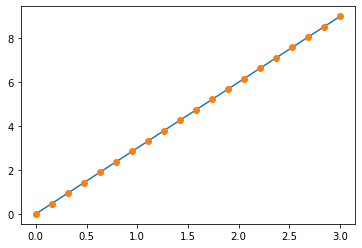

In [32]:
# Create a linear array from 0 to 3, with 20 steps
x = np.linspace(0, 3, 20)

# Create a linear array from 0 to 9, with 20 steps
y = np.linspace(0, 9, 20)

# Plot the line x, y
plt.plot(x, y)       

# Plot the dots x, y
plt.plot(x, y, 'o')    

### 2D array plotting
Due to their structure, 2D arrays needs to be plotted as images. There is no need to panic. Let's go step by step.

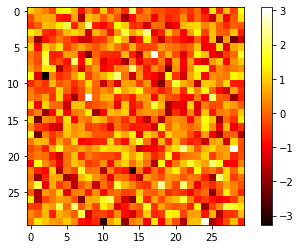

In [33]:
# Let's create a Gaussian image of 30x30
image = np.random.randn(30, 30)

# Let's plot the image with imshow, and select a colormap
plt.imshow(image, cmap=plt.cm.hot)    

# Let's add a colorbar as an index
plt.colorbar()  

#### Where can I find more color maps?

You can find a complete source of colormaps [here](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)

### In class exercise: change the colormap

Change the colormap in the image to be visualized with one of the available matplotlib colormaps.

In [34]:
# Let's create a Gaussian image of 30x30
image = np.random.randn(30, 30)

# Let's plot the image with imshow, and select a colormap
plt.imshow(image, cmap=plt.cm.?)    

# Let's add a colorbar as an index
plt.colorbar() 

SyntaxError: invalid syntax (<ipython-input-34-993e6eede4aa>, line 5)

## NumPy indexing

Another recap from the previous sessions. Remember that indices always in NumPy begin at O.

![alt text](https://scipy-lectures.org/_images/numpy_indexing.png)

### Access items of array

In [ ]:
a = np.arange(11)
a

In [ ]:
a[0], a[2], a[-1]

### Reverse a sequence

In [ ]:
a[::-1]

### Multidimensional arrays

Indexes in multidimensional arrays are tupes of integers.

In 2D, the first dimension corresponds to rows, the second to columns.
F
or multidimensional `a` or `a[0]` is interpreted by taking all elements in the unspecified dimensions.

#### Indexing

In [ ]:
a = np.diag(np.arange(3))
a

In [ ]:
# Second line, second column
a[1, 1]

In [ ]:
# Change for number 99 in Third line, Second column
a[2, 1] = 99 
a

In [ ]:
# Retrieve second line
a[1]

#### Slicing
By default, the three slice components are not required: by default, start is 0, end is the last and step is 1

In [ ]:
a = np.arange(11)
a

In [ ]:
# [start:end:step]
a[0:11:2] 

In [ ]:
# The last index is never included!!!!!
a[:10]

In [ ]:
# By default, start is 0, end is the last and step is 1.
a[1:3]
print("\n")
a[::2]
print("\n")
a[3:]

In [ ]:
# Combination of assignment and slicing
a[1:4] = -4
a
print("\n")
a[::4] = 99
a

## Copies vs. views

A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use 

`np.may_share_memory()` to check if two arrays share the same memory block. Note however, that this uses heuristics and may give you false positives.

In [ ]:
a = np.arange(10)
a

In [ ]:
b = a[::2]
b

In [ ]:
np.may_share_memory(a, b)

In [ ]:
# When we change an index in the view
b[0] = 12
b

In [ ]:
# The original is modified as well
a

In [ ]:
# We need to create a copy() to put changes that are not reflected in the original
d = a.copy()
d

In [ ]:
d[0] = 0
d

In [ ]:
# The copy is in a different memory allocation
np.may_share_memory(a, d)

## Fancy or Advanced array indexing
NumPy arrays can be indexed with slices, but as well with boolean or integer arrays (masks). This method creates copies rather than views.

### Mask with boolean array

In [ ]:
# We start with getting a seed and a random integer array
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

In [ ]:
# Create a Boolean array when the residuals of a/3 are 0
(a % 3 == 0)

In [ ]:
# Create a Boolean mask when the residuals of a/3 are 0
mask = (a % 3 == 0)

# Extract a sub-array with the mask
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           

### Mask with integer array

In [ ]:
a = np.arange(0, 100, 10)
a

In [ ]:
# Indexing by position
# [2, 3, 2, 4, 2] is a Python list
b = a[[2, 3, 2, 4, 2]]
b

In [ ]:
np.may_share_memory(a, b)

Some more fancy indexing:

![alt text](https://scipy-lectures.org/_images/numpy_fancy_indexing.png)

## For what do we use all this??

See this [amazing visual presentation](http://jalammar.github.io/visual-numpy/):

* For matrix computation
* Data representation
* Audio
* Image
* Text



# Basic image manipulation in Python: NumPy and Scipy

Image can be understood as a 2D numerical array. Or 3D such as RGB, or MRI, etc. From now on, we will understand **image==np.array**

We will be using basically `numpy` for basic array manipulation and `scipy` with its `ndimage` submodule dedicated for image processing of n-dimensional images.


## Common tasks in image processing

* Input/Output, displaying images
* Basic manipulations: cropping, flipping, rotating, …
* Image filtering: denoising, sharpening
* Image segmentation: labeling pixels corresponding to different objects
* Classification
* Feature extraction
* Registration
* …

In [52]:
%matplotlib inline

In [51]:
conda-forge imageio


CommandNotFoundError: No command 'conda imageio'.


Note: you may need to restart the kernel to use updated packages.


## Opening and writing to image files

In [48]:
import imageio
from scipy import misc

f = misc.face()
imageio.imwrite('face.jpg', f)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

ModuleNotFoundError: No module named 'imageio'

### Go from image to numpy array

In [ ]:
face = imageio.imread('face.jpg')
type(face)      

print("\n", face.shape, face.dtype)



### Slicing the image

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(face[200:400, 400:800])
plt.show()

## Displaying images
We can pass the image as gray, so that we use it for basic image processing

In [ ]:
f = misc.face(gray=True)  
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)        


We can alter the data by clipping it. Either using plt.imshow() or np.clip(). This will alter the contrast for us.

In [ ]:
f_contrast = np.clip(f, 30, 200)

plt.imshow(f_contrast, cmap=plt.cm.gray)        

# Remove axes and ticks
plt.axis('off')


In [ ]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

## Basic manipulations
Since we are working with arrays, we can perform basic slicing array operation manipulations over the image

In [ ]:
# Retrieve a pixel value
face = misc.face(gray=True)
face[0, 40]

In [ ]:
# Slice an image
plt.figure(figsize=(6, 6))
plt.imshow(face[10:100, 20:100], cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
# Apply a mask
face[100:120] = 0

plt.figure(figsize=(6, 6))
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Statistical information

We can as well retrieve statistical information from the image

In [ ]:
face = misc.face(gray=True)

print("Mean ", face.mean(), "| Max ", face.max(), "| Min ", face.min())


## Geometrical transformation

We can as well transform the images, which is extremely important for data augmentation for instance.

### Cropping

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)

lx, ly = face.shape

# Cropping (using floor division, dumping decimals after operation)
crop_face = face[lx//5:-lx//4, ly//5:-ly//4]

plt.figure(figsize=(6, 6))
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Flipping

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)

# Up-down flip
flip_ud_face = np.flipud(face)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)

# Left right flip
flip_ud_face = np.fliplr(face)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Rotation


In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)

# Rotation
rotate_face = ndimage.rotate(face, 45)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)

# Rotation
rotate_face = ndimage.rotate(face, 45, reshape=False)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Image filtering

### Blurring/smoothing

In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)
local_mean = ndimage.uniform_filter(face, size=11)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Sharpening



In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True).astype(float)

# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(f, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.show()


In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True).astype(float)

# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(f, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
edges_weights = alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(edges_weights, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Denoising

In [ ]:
import numpy as np
import scipy
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)
f = f[230:290, 220:320]

# Create a noisy image
noisy = f + 0.4*f.std()*np.random.random(f.shape)

# Reduce the noise using a gaussian
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

# Reduce the noise using a median filter
med_denoised = ndimage.median_filter(noisy, 3)


plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

## Feature extraction

### Edge detection: sobel filter

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sy)
plt.axis('off')
plt.title('Sobel (y direction)', fontsize=20)
plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

## What we will see in next class

* Mathematical morphology
* Segmentation
* Classification, etc.

Advanced ways to do image processing and filtering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

## In class exercise:

From the following images from scikit image package that we will see in next class (I am opening them for you):

* Slice/crop the image
* Add a white mask to the image
* Rotate tthe image
* Flip the image
* Apply a blurry filter
* Apply a sobel filter
    * Use scipy sobel and scikit image sobel over the same image. What are the differences?

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

from scipy import ndimage
from skimage.data import camera, binary_blobs, coins

import numpy as np

camera = camera()
binary = binary_blobs()
coins = coins()

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(camera, cmap=plt.cm.gray)
ax[0].set_title('Camera')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Blobs')

ax[2].imshow(coins, cmap=plt.cm.gray)
ax[2].set_title('Coins')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()